# Build Dataset

In [6]:
from preprocessing.data import LightDataManager

file_path = 'data/input/test_run.csv'
dm = LightDataManager(file_path)
dm.featurize()

build dataset ..


11.36386489868164 MB
took 0.755 seconds


# Load model

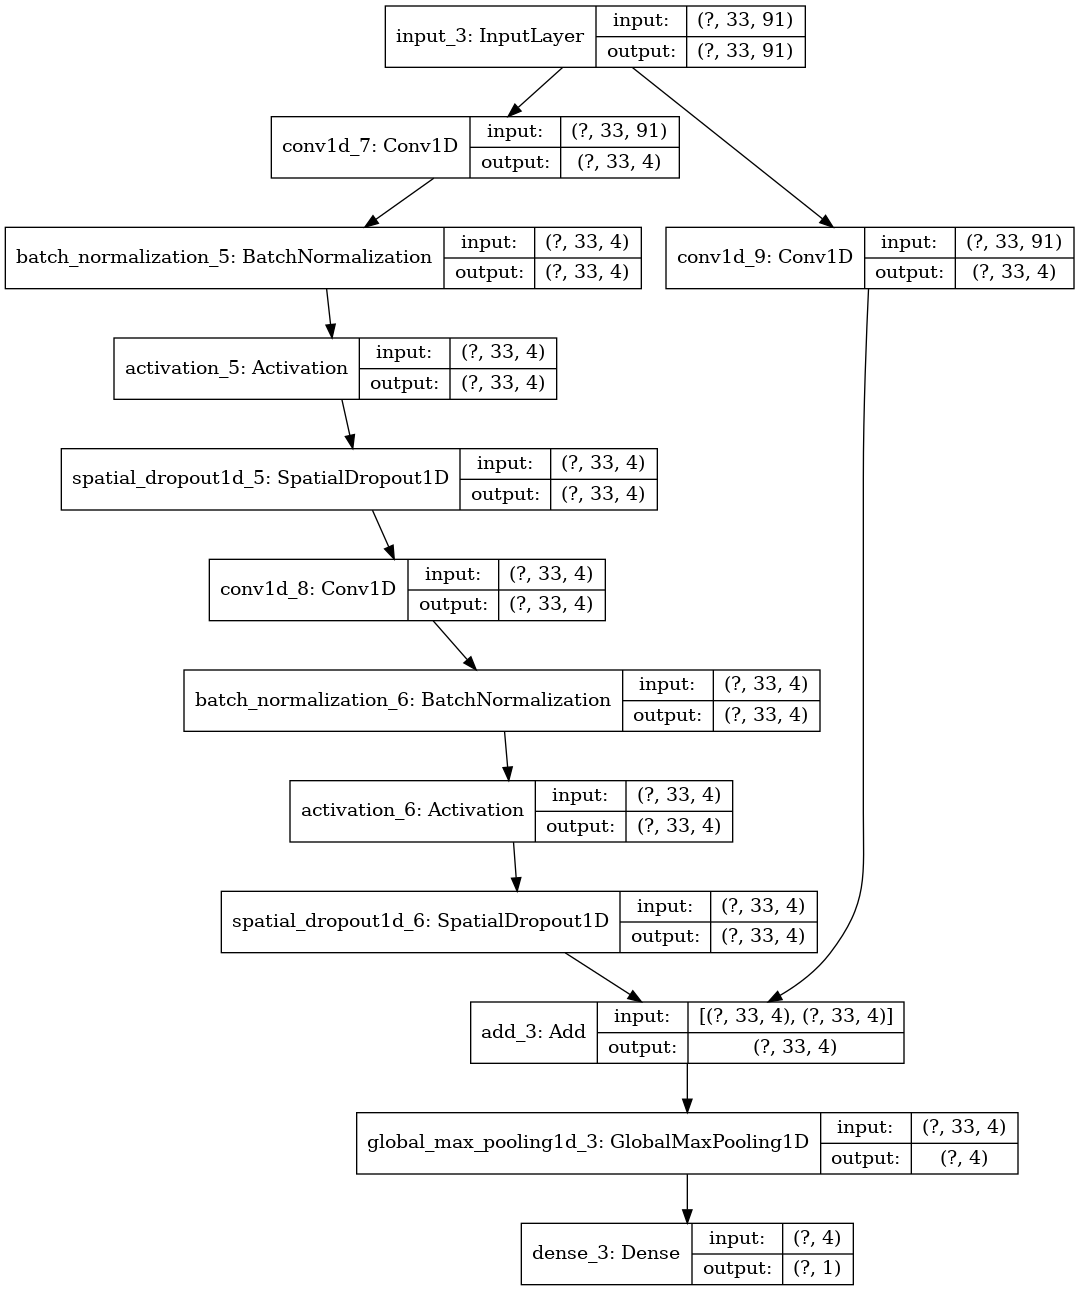

In [7]:
from keras.models import model_from_json
from preprocessing.cnn_model_utils import build_cnn_model, CNNKerasRegressor
import tensorflow as tf

model_arch_path = 'data/output/3b6dcb_arch.json'
model_weights_path = 'data/output/3b6dcb_weights.h5'

def dummy_build_fn():
    # Load the model architecture from the JSON file
    with open('path_to_your_model.json', 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(json_string=model_json)
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = CNNKerasRegressor(build_fn=dummy_build_fn)
model.load_pretrained_model(model_arch_path, model_weights_path)

# Plot the model
tf.keras.utils.plot_model(model.model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [8]:
import preprocessing.config as cfg

# remove batch_size from dict, as it is not needed for build function
# batch_size = cfg.keras_cfg['cnn_params'].pop('batch_size')
# window_size = cfg.keras_cfg['window_size']

predict_cfg = {'batch_size': 128,
                'window_size': 32,
                'p_id_col': dm.PROFILE_ID_COL}

# predict
x_tst = dm.tst_df[dm.x_cols + [dm.PROFILE_ID_COL]]
y_tst = dm.tst_df[dm.y_cols]

pred = model.predict(x_tst, **predict_cfg)

pred = dm.inverse_transform(pred)
y_tst = dm.inverse_transform(y_tst)

ValueError: Error when checking input: expected input_3 to have shape (33, 91) but got array with shape (32, 91)

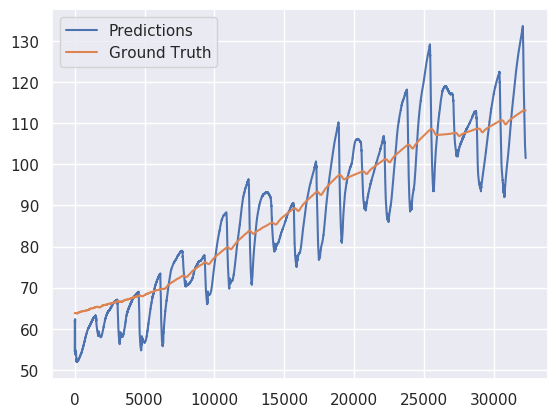

In [ ]:
# Plot predictions vs ground truth
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(pred, label='Predictions')
plt.plot(y_tst, label='Ground Truth')
plt.legend()
plt.show()

